In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

weather_df = pd.read_csv("G:\Data Science ML AI\Python files\Projects\Project_Visualizing the weather dataset\Weather_Dataset.csv",parse_dates = True, index_col = 'Date/Time')
weather_df.head(5)


,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:
#checking the shape of dataset
weather_df.shape

(8784, 7)

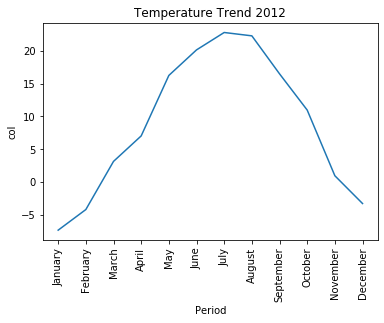

In [14]:
# Generate a line chart that visualizes the readings in the months\ (by using function)

def line_chart(df,period,col):
    """ A line chart that visualizes the readings in the months
    
    This function accepts the dataframe df ,period(day/month/year) and col(feature), which plots the aggregated value of the feature based on the periods. Ensure the period labels are properly named.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    period - Period of time over which you want to aggregate the data
    col - Feature of the dataframe
    
    """
    
    if period == "Month":
        data = df.groupby(df.index.month).mean()
    elif period == 'Day':
        data = df.groupby(df.index.day).mean()
    elif period == "Year":
        data = df.groupby(df.index.year).mean()
        
    calendar_months = calendar.month_name[1:]
    x_series = calendar_months
    y_series = data[col]
    
    plt.plot(x_series,y_series)
    plt.title("Temperature Trend 2012")
    plt.xlabel("Period")
    plt.ylabel("col")
    plt.xticks(rotation=90)
    
    plt.show()
    
#Calling the function to plot monthly values in line chart
line_chart(weather_df,"Month","Temp (C)")
    
    
        


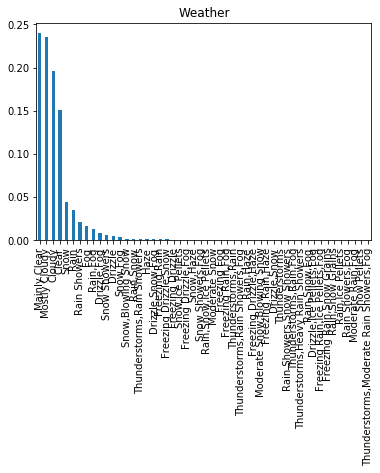

In [31]:
# Function to perform analysis of categorical columns
def plot_categorical_columns(df):
    """ Univariate analysis of categorical columns
    
    This function accepts the dataframe df which analyzes all the variable in the data and performs the univariate analysis using bar plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    
    """
    categorical_columns = df.select_dtypes(include = ['object']).columns
    
    for i in range(0, len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            
            plt.figure(figsize=(20,15))
            plt.subplot(200)
            df[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i])
            plt.subplot(200)
            df[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i+1])
            plt.tight_layout()
            plt.show()
            plt
            
        else:
            df[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i])
            plt.show()



           
            
#calling the functionm to plot values
plot_categorical_columns(weather_df)
                                                                    
        
                                                                        
                                                                   

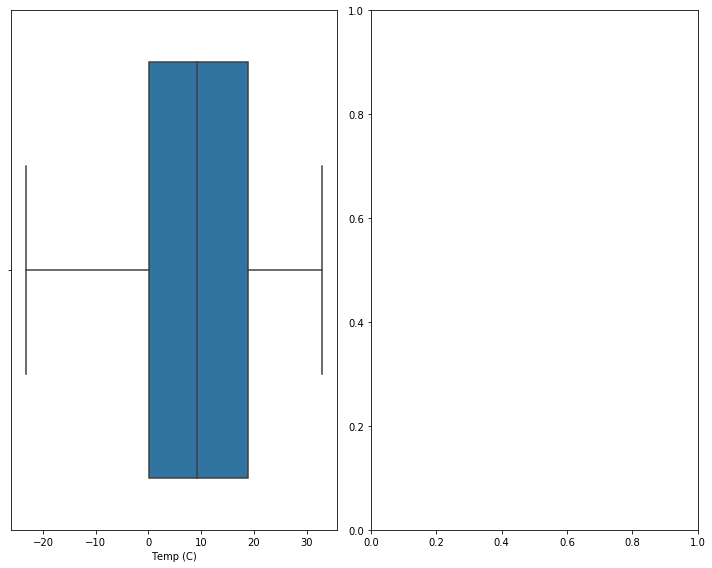

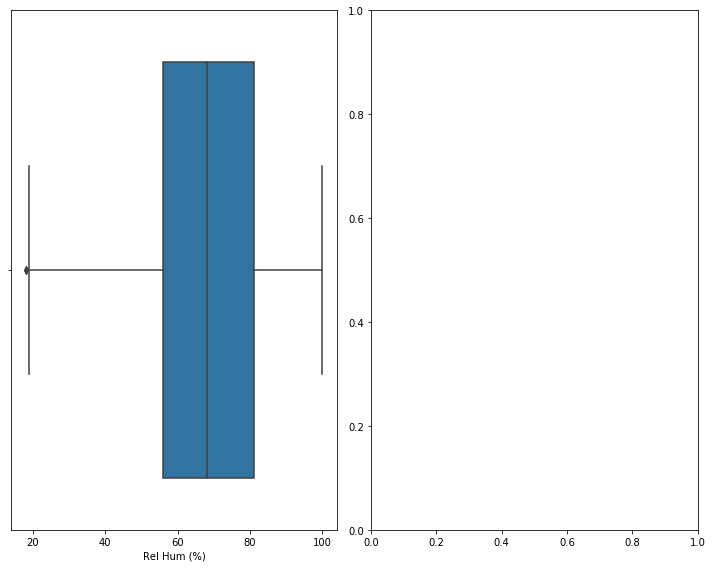

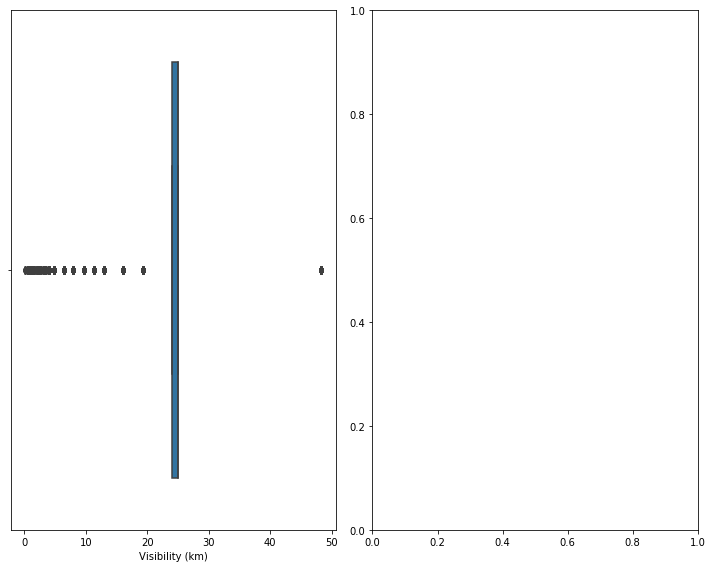

In [44]:
# Function to plot continous plots
def plot_cont(df,plt_typ):

    """ Univariate analysis of Numerical columns
    
    This function accepts the dataframe df, plt_type(boxplot/distplot) which analyzes all the variable in the data and performs the univariate analysis using boxplot or distplot plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    plt_type - type of plot through which you want to visualize the data
    
    """
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    df = df[numeric_columns]
    
    for i in range(0, len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            
            if plt_typ == "boxplot":
                sns.boxplot(df[numeric_columns[i]])
                plt.subplot(122)
            elif plt_typ == "distplot":
                sns.distplot(df[numeric_columns[i]])
                plt.subplot(122)
                sns.distplot(df[numeric_columns[i+1]])
            else:
                print("Pass either distplot or boxplot")
                
        plt.tight_layout()
        plt.show()
        
#calling the function to plot boxplot
plot_cont(weather_df,"boxplot")
     

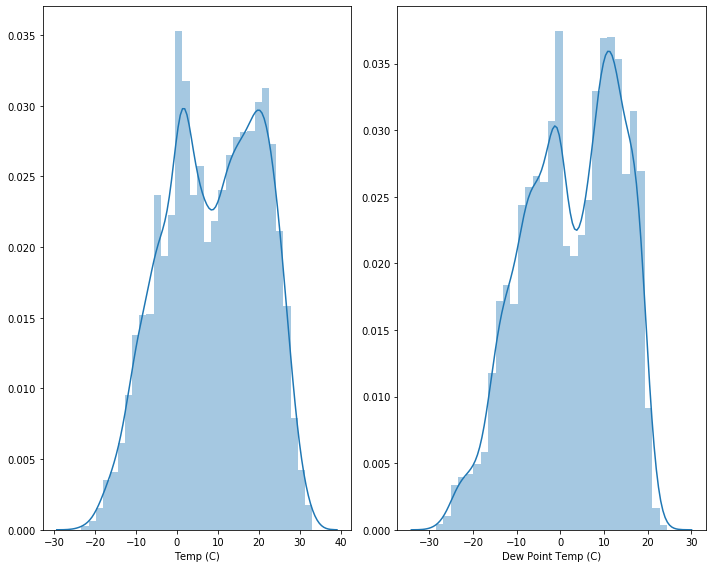

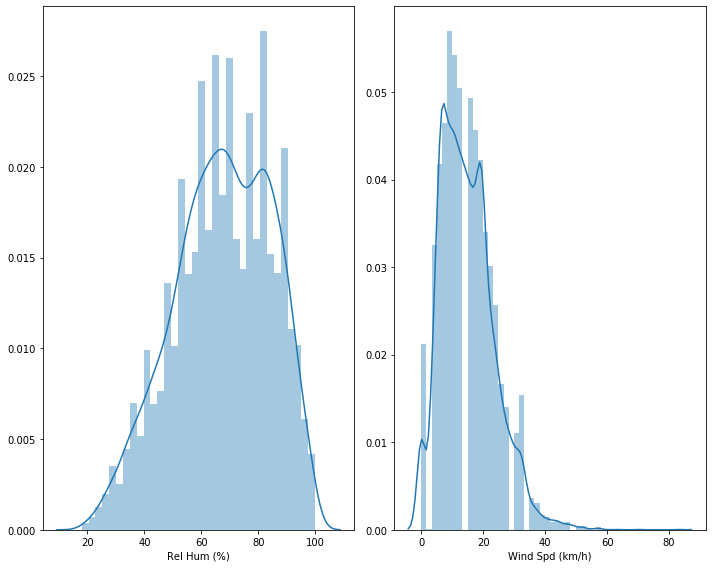

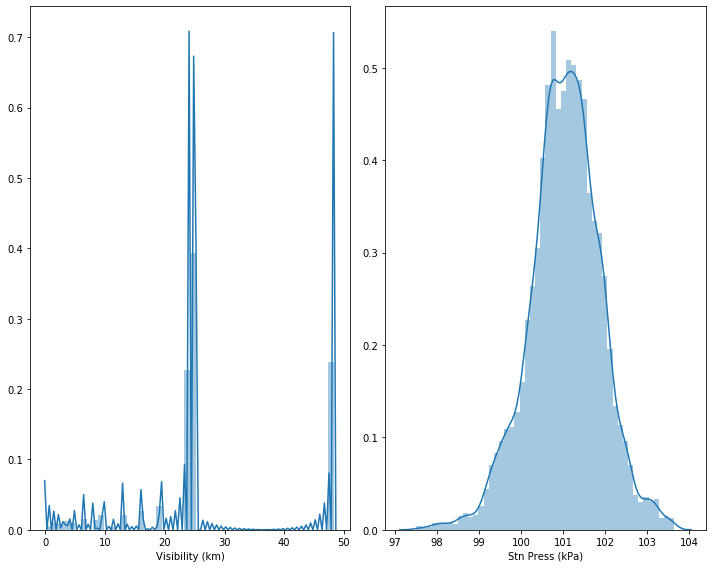

In [41]:
#calling the function to plot distplot
plot_cont(weather_df,"distplot")

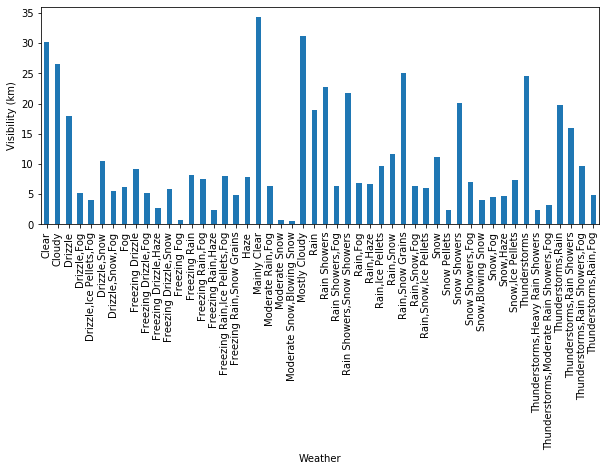

In [45]:
# Function to plot grouped values based on the feature
def group_values(df,col1,agg1,col2):

    """ Agrregate values by grouping
    
    This function accepts a dataframe, 2 column(feature) and aggregated function(agg1) which groupby the dataframe based on the column and plots the bar plot.
   
    Keyword arguments:
    df - Pandas dataframe which has the data.
    col1 - Feature of the dataframe on which values will be aggregated.
    agg1 - Dictionary of aggregate functions with feature as the key and func as the value
    col2 - Feature of the dataframe to be plot against grouped data.
    
    Returns:
    grouping - Dataframe with all columns on which it is grouped on.
    """
    aggregate = {'mean':np.mean, 'max':np.max, 'min':np.min}
    grouping = df.groupby(col1).agg(aggregate[agg1])
    plt.figure(figsize=(10,4))
    plt.ylabel(col2)
    grouping[col2].plot(kind='bar')
    plt.show
    
#calling the function to plot values
group_values(weather_df, "Weather", "mean", "Visibility (km)")